In [1]:
import pandas as pd
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #eng
import numpy as np #special char
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("X_Tweets_Filtered.csv")
df1 = pd.read_csv("tweet_sentiments.csv")
senate = pd.read_csv("senate25-final_updated.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


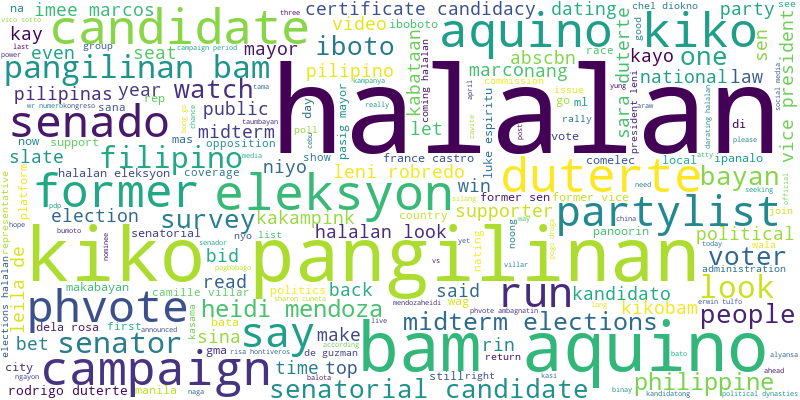

In [2]:
#filtered word cloud

stop_words = stopwords.words('english')

df = df[(df['Content'].notnull()) & (df['Content']!=u'') ]
df['textstop'] = df['Content'].str.lower()
import stopwordsiso as stopwords #fil
istop_words = stopwords.stopwords("tl")
tag = pd.read_csv("genediazjr-tagalog.txt", header=None, delimiter="\t")[0].astype(str).tolist() #morefil 
tag = [w.lower() for w in tag]

df['textstop'] = df['textstop'].astype(str) .apply(lambda words: ' '.join(word for word in words.split() if word not in stop_words and word not in istop_words and word not in tag))
df['textstop'] = df['textstop'].fillna('').astype(str).str.replace(r'[^A-Za-z ]', '', regex=True).replace('', np.nan, regex=False)

word_freq = df['textstop'].str.lower().str.split().explode().value_counts()
#word_freq[:20].to_frame().style

text = ' '.join(df['textstop'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
wordcloud.to_image()


<Axes: xlabel='mentioned_candidate_AI', ylabel='associated_word_AI'>

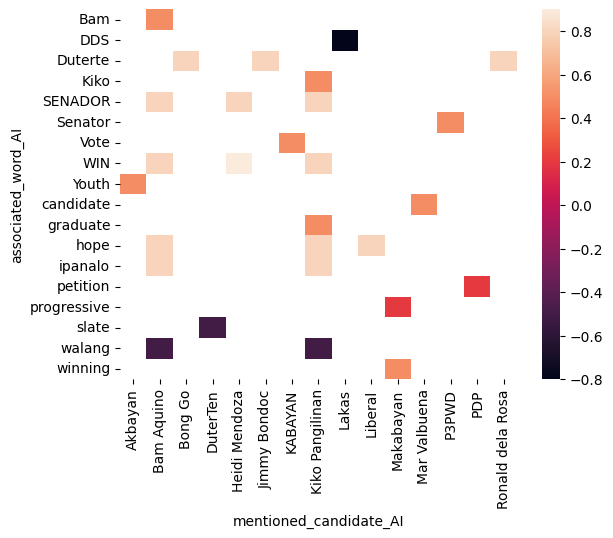

In [3]:
candidates = ['Benhur Abalos', 'Jerome Adonis', 'Wilson Amad', 'Jocelyn Andamo', 'Bam Aquino', 'Ronnel Arambulo', 'Ernesto Arellano', 'Roberto Ballon', 'Abigail Binay', 'Jimmy Bondoc', 'Bong Revilla', 'Bonifacio Bosita', 'Arlene Brosas', 'Roy Cabonegro', 'Allen Capuyan', 'Teodoro Casiño', 'France Castro', 'Pia Cayetano', "David d'Angelo", 'Angelo de Alban', 'Leody de Guzman', 'Ronald dela Rosa', 'Mimi Doringo', 'Arnel Escobal', 'Luke Espiritu', 'Mody Floranda', 'Marc Gamboa', 'Bong Go', 'Norberto Gonzales', 'Jesus Hinlo Jr.', 'Gregorio Honasan', 'Relly Jose Jr.', 'Panfilo Lacson', 'Raul Lambino    PDP', 'Lito Lapid', 'Wilbert T. Lee', 'Amirah Lidasan', 'Rodante Marcoleta', 'Imee Marcos', 'Norman Marquez', 'Eric Martinez', 'Richard Mata', 'Sonny Matula', 'Liza Maza', 'Heidi Mendoza', 'Jose Montemayor Jr.', 'Subair Mustapha', 'Jose Olivar', 'Willie Ong', 'Manny Pacquiao', 'Francis Pangilinan', 'Ariel Querubin', 'Apollo Quiboloy', 'Danilo Ramos', 'Willie Revillame', 'Vic Rodriguez', 'Nur-Ana Sahidulla', 'Phillip Salvador', 'Tito Sotto', 'Michael Tapado', 'Francis Tolentino', 'Ben Tulfo', 'Erwin Tulfo', 'Mar Valbuena', 'Leandro Verceles Jr.', 'Camille Villar']
partylists = ['Nacionalista', 'DuterTen', 'PLM', 'Reform PH', 'Lakas', 'KANP', 'PPP', 'Liberal', 'Aksyon', 'NPC', 'PFP', 'DPP', 'PDP', 'KBL', 'Makabayan', 'KKK', 'Bunyog', 'PM', 'PDSP', 'Independent', 'WPP']


tab = pd.pivot_table(data=df1, index=df1['associated_word_AI'],columns=df1['mentioned_candidate_AI'], values='polarity_AI', aggfunc='mean')

plt.figure()
sns.heatmap(tab)

In [ ]:
# Correlation plot (heat map)
import plotly.express as px

# df1[['associated_word_AI', 'polarity_AI']].head()
# df1[['associated_word_AI', 'polarity_AI']].info()
num_features = ['polarity_AI']
df1 = df1.dropna(subset=num_features)
corr = df1[num_features].corr() 

fig = px.imshow(corr,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1,
                labels=dict(x='Features', y='Features', color='Correlation'),
                x=corr.columns,
                y=corr.columns)
fig.show()

mapping = {'Infavor': 1, 'neutral': 0, 'negative': -1}
df1['associated_word_AI_num'] = df1['associated_word_AI'].map(mapping)